In [39]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

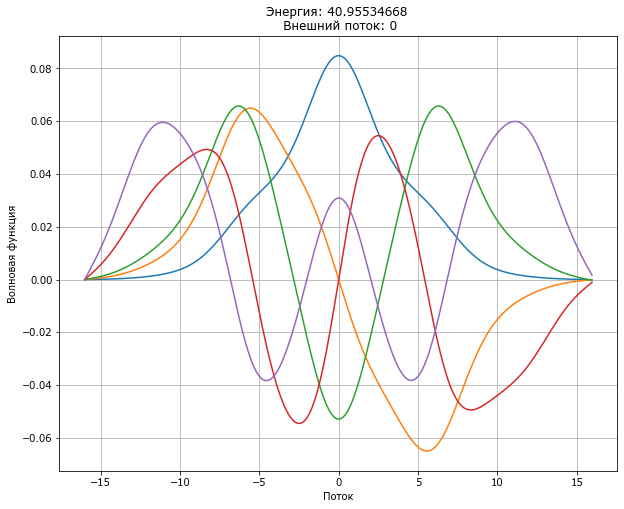

In [48]:
E_L = 0.5
E_J = 10
E_C = 20
phi = 0

N= 800
h = 0.04
b=h**2 /12
a=0.1
precision=9
    
E=0 
E_step = 0.1 
E_step_sign = 1

eigenfunctions=[]
eigenvalues=[]
    
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
Y = [y1, y2, y3, y4, y5, y6]
    
lastsign=0; 

nextVal=False

fig=plt.figure(figsize=(10, 8)) 
ax=fig.add_subplot(111)
line,=ax.plot([0],[0])
plt.ion()
plt.xlabel('Поток')
plt.ylabel('Волновая функция')
plt.grid()
plt.show()

    
eigenfunctions = []
E = 0
def V(x):
    V = E_L * (x)**2 / 2 - E_J * np.cos(x + phi)
    return V

def G(x,E):
    return (E-V(x))/(4*E_C)

exit=False 
p = 0
    
while (not exit):
    x = np.zeros(N, dtype=np.float64)
    y = np.zeros(N, dtype=np.float64)    
    k = np.zeros(N, dtype=np.float64) 
    i = 0
    y[i] = 0 
    x[i] = -N/2*h
    k[i] = G(x[i],E)
    y[i+1] = a
    x[i+1] = x[i]+h
    k[i+1] = G(x[i+1],E)
    i+=1    

    while(i < N-1):
        x[i+1] = x[i] + h
        k[i+1] = G(x[i+1], E)
        y[i+1] = (2*(1-5*b*k[i])*y[i]-(1+b*k[i-1])*y[i-1])/(1+b*k[i+1]) 
        i+=1

    line.set_data(x, y/np.sqrt((np.abs(y)**2).sum()))
    ax.relim()
    ax.autoscale_view()
    ax.set_title('Энергия: %.10g \n Внешний поток: %g'%(E, phi))
    display.clear_output(wait=True)
    display.display(fig) 


        #Проверяем знак волновой функции в последней точке, чтобы убедиться, что на бесконечности она равна нулю. 
        #Если знак при переходе от одной итерации к другой изменяется, то мы сужаем интервал энергии в два раза.

    sign = y[-1] / abs(y[-1])
    if (lastsign == 0):
        lastsign = sign
    elif (sign != lastsign):
        lastsign = sign
        E_step_sign = E_step_sign*(-1)
        E_step = E_step / 2       
        if E_step < 10**(-precision):
            nextVal=True
            p = p + 1

        #Если расстояние от 0 последнего шага точки меньше  заданной точности, и мы начинаем поиск следующего решения.
    if abs(y[-1])<10*a:
        nextVal=True
        p = p + 1

    if nextVal:
        eigenvalues.append(E)
        eigenfunctions.append(y)
        E_step=0.1
        E_step_sign=1
        lastsign=0
        line,=ax.plot([0],[0])
        nextVal=False 
        if len(eigenfunctions) >= 5:
            exit=True
            
    Y[p] = y/np.sqrt((np.abs(y)**2).sum())
    E += E_step_sign*E_step

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


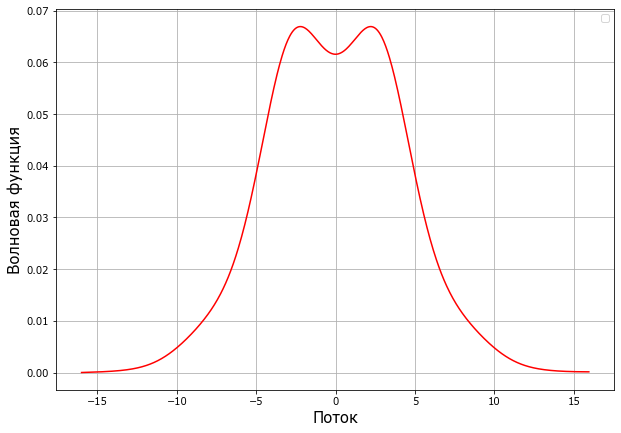

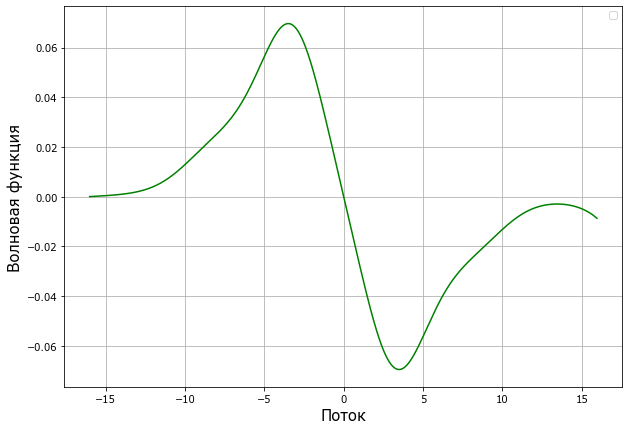

In [37]:
plt.figure(figsize=(10, 7))
plt.plot(x, Y[0], marker='', linestyle='-', c = 'r')
plt.grid()
plt.xlabel("Поток", fontsize=15)
plt.ylabel("Волновая функция", fontsize=15)
plt.legend()

plt.figure(figsize=(10, 7))
plt.plot(x, Y[1], marker='', linestyle='-', c = 'g')
plt.grid()
plt.xlabel("Поток", fontsize=15)
plt.ylabel("Волновая функция", fontsize=15)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


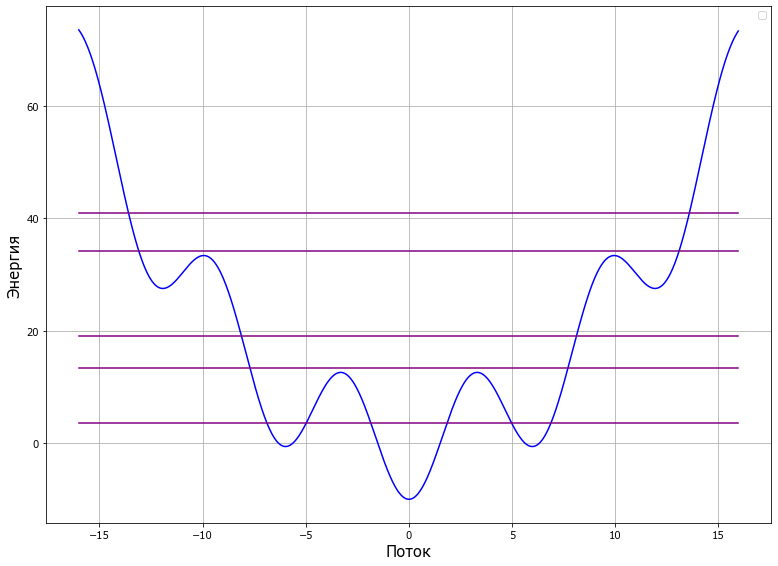

In [51]:
V1 = []
E0 = []
E1 = []
E2 = []
E3 = []
E4 = []
for i in range(len(x)):
    W = E_L * (x[i])**2 / 2 - E_J * np.cos(x[i] + phi)
    V1.append(W)
    E0.append(eigenvalues[0])
    E1.append(eigenvalues[1])
    E2.append(eigenvalues[2])
    E3.append(eigenvalues[3])
    E4.append(eigenvalues[4])
plt.figure(figsize=(13, 9.5))
plt.plot(x, V1, marker='', linestyle='-', c = 'b')
plt.plot(x, E0, marker='', linestyle='-', c = 'purple')
plt.plot(x, E1, marker='', linestyle='-', c = 'purple')
plt.plot(x, E2, marker='', linestyle='-', c = 'purple')
plt.plot(x, E3, marker='', linestyle='-', c = 'purple')
plt.plot(x, E4, marker='', linestyle='-', c = 'purple')
plt.grid()
plt.xlabel("Поток", fontsize=15)
plt.ylabel("Энергия", fontsize=15)
plt.legend()